In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import pygwalker as pyg

In [2]:
jogos = pd.read_csv('matches_FLA2023.csv', parse_dates=['kick-off'])
gols = pd.read_csv('goal_scorers.csv')

In [3]:
jogos.head()

,id_match,home_team,away_team,home_score,away_score,tournament,kick-off,stadium
0,CA1,Flamengo,Audax-RJ,1,0,Carioca - Taça Guanabara - Round 5,2023-01-12 21:30:00,Maracanã-RJ
1,CA2,Flamengo,Portuguesa-RJ,4,1,Carioca - Taça Guanabara - Round 1,2023-01-15 18:00:00,Maracanã-RJ
2,CA3,Madureira-RJ,Flamengo,0,0,Carioca - Taça Guanabara - Round 2,2023-01-18 19:00:00,Kléber Andrade-ES
3,CA4,Flamengo,Nova Iguaçu-RJ,5,0,Carioca - Taça Guanabara - Round 3,2023-01-21 16:00:00,Maracanã-RJ
4,CA5,Bangu-RJ,Flamengo,1,1,Carioca - Taça Guanabara - Round 4,2023-01-24 21:10:00,Raulino de Oliveira-RJ


In [4]:
gols.head()

,id_match,gols,assist
0,CA1,Matheus França,Thiaguinho
1,CA2,Pedro,Ayrton Lucas
2,CA2,Gabi,Pedro
3,CA2,Fabrício Bruno,Pedro
4,CA2,Thiago Maia,Matheuzinho


In [5]:
df = pd.merge(jogos, gols, on = 'id_match')
df.head()

,id_match,home_team,away_team,home_score,away_score,tournament,kick-off,stadium,gols,assist
0,CA1,Flamengo,Audax-RJ,1,0,Carioca - Taça Guanabara - Round 5,2023-01-12 21:30:00,Maracanã-RJ,Matheus França,Thiaguinho
1,CA2,Flamengo,Portuguesa-RJ,4,1,Carioca - Taça Guanabara - Round 1,2023-01-15 18:00:00,Maracanã-RJ,Pedro,Ayrton Lucas
2,CA2,Flamengo,Portuguesa-RJ,4,1,Carioca - Taça Guanabara - Round 1,2023-01-15 18:00:00,Maracanã-RJ,Gabi,Pedro
3,CA2,Flamengo,Portuguesa-RJ,4,1,Carioca - Taça Guanabara - Round 1,2023-01-15 18:00:00,Maracanã-RJ,Fabrício Bruno,Pedro
4,CA2,Flamengo,Portuguesa-RJ,4,1,Carioca - Taça Guanabara - Round 1,2023-01-15 18:00:00,Maracanã-RJ,Thiago Maia,Matheuzinho


In [6]:
df_gols_counts = pd.DataFrame(df.gols.value_counts())
df_gols_counts = df_gols_counts.reset_index()
df_gols_counts.columns = ['Jogador', 'Gols'] 
print(df_gols_counts.to_markdown(index=False))

| Jogador           |   Gols |
|:------------------|-------:|
| Pedro             |     21 |
| Gabi              |     13 |
| Ayrton Lucas      |      4 |
| Fabrício Bruno    |      3 |
| Matheus França    |      2 |
| Thiago Maia       |      2 |
| Matheus Gonçalves |      2 |
| Arrascaeta        |      2 |
| Everton Cebolinha |      2 |
| Gerson            |      2 |
| Léo Pereira       |      2 |
| Lorran            |      1 |
| André Luiz        |      1 |


In [7]:
df_assist_counts = pd.DataFrame(df.assist.value_counts())
df_assist_counts = df_assist_counts.reset_index()
df_assist_counts.columns = ['Jogador', 'Assistência'] 
print(df_assist_counts.to_markdown(index=False))

| Jogador           |   Assistência |
|:------------------|--------------:|
| Everton Cebolinha |             5 |
| Matheuzinho       |             4 |
| Ayrton Lucas      |             4 |
| Everton Ribeiro   |             3 |
| Pedro             |             3 |
| Arrascaeta        |             3 |
| Marinho           |             3 |
| Gerson            |             3 |
| Mateusão          |             2 |
| Gabi              |             2 |
| Arturo Vidal      |             2 |
| Victor Hugo       |             1 |
| Fabricio Bruno    |             1 |
| Thiaguinho        |             1 |
| Pablo             |             1 |
| Filipe Luis       |             1 |
| Eric Pulgar       |             1 |


In [8]:
new_df = pd.concat([df_assist_counts, df_gols_counts], axis=1)

print(new_df.to_markdown(index=False))

| Jogador           |   Assistência | Jogador           |   Gols |
|:------------------|--------------:|:------------------|-------:|
| Everton Cebolinha |             5 | Pedro             |     21 |
| Matheuzinho       |             4 | Gabi              |     13 |
| Ayrton Lucas      |             4 | Ayrton Lucas      |      4 |
| Everton Ribeiro   |             3 | Fabrício Bruno    |      3 |
| Pedro             |             3 | Matheus França    |      2 |
| Arrascaeta        |             3 | Thiago Maia       |      2 |
| Marinho           |             3 | Matheus Gonçalves |      2 |
| Gerson            |             3 | Arrascaeta        |      2 |
| Mateusão          |             2 | Everton Cebolinha |      2 |
| Gabi              |             2 | Gerson            |      2 |
| Arturo Vidal      |             2 | Léo Pereira       |      2 |
| Victor Hugo       |             1 | Lorran            |      1 |
| Fabricio Bruno    |             1 | André Luiz        |     

In [9]:
vitorias_casa = jogos[(jogos['home_team'] == 'Flamengo') & (jogos['home_score'] > jogos['away_score'])]
derrotas_casa = jogos[(jogos['home_team'] == 'Flamengo') & (jogos['home_score'] < jogos['away_score'])]

vitorias_fora = jogos[(jogos['away_team'] == 'Flamengo') & (jogos['away_score'] > jogos['home_score'])]
derrota_fora = jogos[(jogos['away_team'] == 'Flamengo') & (jogos['away_score'] < jogos['home_score'])]

empate_casa = jogos[(jogos['home_team'] == 'Flamengo') & (jogos['away_score'] == jogos['home_score'])]
empate_fora = jogos[(jogos['away_team'] == 'Flamengo') & (jogos['away_score'] == jogos['home_score'])]

In [10]:
vitorias = vitorias_casa.shape[0] + vitorias_fora.shape[0]
empates = empate_casa.shape[0] + empate_fora.shape[0]
derrotas = derrotas_casa.shape[0] + derrota_fora.shape[0]
total_jogos = vitorias + empates + derrotas

In [11]:
j_marcou_casa = jogos[(jogos['home_team'] == 'Flamengo') & (jogos['home_score'] > 0)]
j_marcou_fora =  jogos[(jogos['away_team'] == 'Flamengo') & (jogos['away_score'] > 0)]

jogou_marcou = j_marcou_casa.shape[0] + j_marcou_fora.shape[0]

In [12]:
j_sofreu_casa = jogos[(jogos['home_team'] == 'Flamengo') & (jogos['away_score'] > 0)]
j_sofreu_fora =  jogos[(jogos['away_team'] == 'Flamengo') & (jogos['home_score'] > 0)]

jogou_sofreu = j_sofreu_casa.shape[0] + j_sofreu_fora.shape[0]

In [13]:
gols_pro = vitorias_casa['home_score'].sum() + derrotas_casa['home_score'].sum() + vitorias_fora['away_score'].sum() + derrota_fora['away_score'].sum() + empate_casa['home_score'].sum() + empate_fora['away_score'].sum()
gols_per_jogo = round(gols_pro/total_jogos,2)

In [14]:
gols_contra = vitorias_casa['away_score'].sum() + derrotas_casa['away_score'].sum() + vitorias_fora['home_score'].sum() + derrota_fora['home_score'].sum() + empate_casa['away_score'].sum() + empate_fora['home_score'].sum()
gols_sofrido_jogo = round(gols_contra/total_jogos,2)

In [15]:
saldo_gols = gols_pro - gols_contra

In [16]:
aproveitamento = round((3*vitorias + 1*empates + 0*derrotas)/(3*total_jogos)*100,2)
aproveitamento_pontos = (3*vitorias + 1*empates + 0*derrotas)

In [17]:
print(
"""
Jogos: {0}
Vitórias: {1}
Empates: {2}
Derrotas: {3} 
Gols pro: {4}
Gols contra: {5}
Saldo de gols: +{6}
Gols/jogo: {7}
Gols sofridos/jogo: {13}
Jogos em que marcou: {8}
Jogos em que sofreu gol: {9} 
Aproveitamento: {10}%
Aproveitamento pontos: {11}/{12}
""".format(total_jogos, vitorias, empates, derrotas, 
           gols_pro, gols_contra, saldo_gols, gols_per_jogo, jogou_marcou, 
           jogou_sofreu,aproveitamento,aproveitamento_pontos, 3*total_jogos,gols_sofrido_jogo) 


)


Jogos: 29
Vitórias: 15
Empates: 3
Derrotas: 11 
Gols pro: 57
Gols contra: 37
Saldo de gols: +20
Gols/jogo: 1.97
Gols sofridos/jogo: 1.28
Jogos em que marcou: 25
Jogos em que sofreu gol: 19 
Aproveitamento: 55.17%
Aproveitamento pontos: 48/87



INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO: Using categori

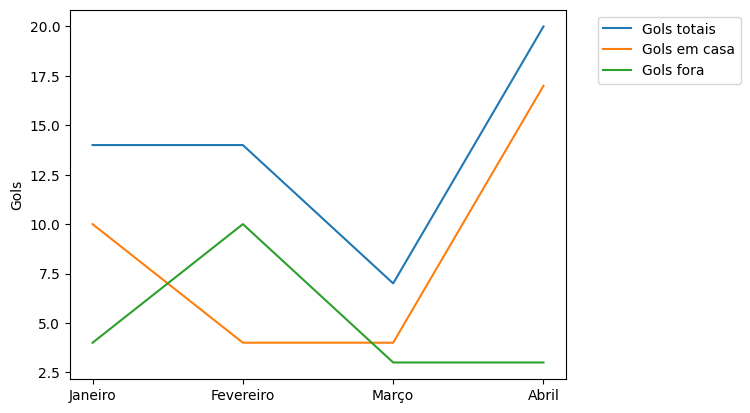

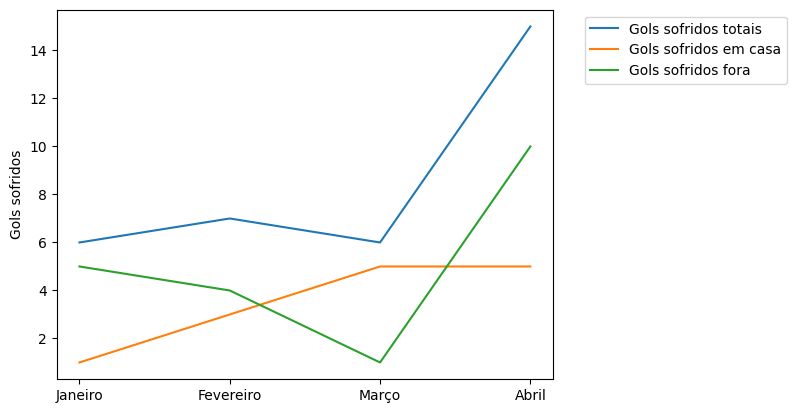

In [18]:
#j_marcou_casa[['home_score', 'kick-off']]
#j_marcou_casa['kick-off'].dt.month_name()

new_order = ['January', 'February', 'March', 'April']#, 'May', 'June', 
             #'July', 'August', 'September', 'October', 'November', 'December']

gols_home = j_marcou_casa.groupby(j_marcou_casa['kick-off'].dt.month_name())['home_score'].sum().reindex(new_order, axis=0)
gols_away = j_marcou_fora.groupby(j_marcou_fora['kick-off'].dt.month_name())['away_score'].sum().reindex(new_order, axis=0)

sofridos_home = j_sofreu_casa.groupby(j_sofreu_casa['kick-off'].dt.month_name())['away_score'].sum().reindex(new_order, axis=0)
sofridos_away = j_sofreu_fora.groupby(j_sofreu_fora['kick-off'].dt.month_name())['home_score'].sum().reindex(new_order, axis=0)

labels = ['Janeiro', 'Fevereiro', 'Março', 'Abril']

#fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15), sharex=True)

plt.figure(1)

plt.plot(gols_home.index,gols_home.fillna(0)+gols_away.fillna(0), label = 'Gols totais')
plt.plot(gols_home.index,gols_home.fillna(0), label = 'Gols em casa')
plt.plot(gols_home.index,gols_away.fillna(0), label = 'Gols fora')
plt.ylabel('Gols')
plt.xticks(gols_home.index, labels)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
 
plt.figure(2)
plt.plot(sofridos_home.index,sofridos_home.fillna(0)+sofridos_away.fillna(0), label = 'Gols sofridos totais')
plt.plot(sofridos_home.index,sofridos_home.fillna(0), label = 'Gols sofridos em casa')
plt.plot(sofridos_home.index,sofridos_away.fillna(0), label = 'Gols sofridos fora')
plt.ylabel('Gols sofridos')
plt.xticks(gols_home.index, labels)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.show()